In [ ]:
import cv2 as cv
import numpy as np
img1=cv.imread("images1.jfif")
img2=cv.imread("images1.jfif")
# resize=cv.resize(img2 ,(184,274) , interpolation=cv.INTER_NEAREST)   #becoz of same dimension images will add
print(img1.shape)
print(img2.shape)
cv.imshow("image 1 " , img1)
cv.imshow("image 2" , img2)

# Syntax: cv2.addWeighted(img1, wt1, img2, wt2, gammaValue)
addition=cv.addWeighted(img1 , 0.5 ,img1 , 0.4 , 0)
cv.imshow("additionn images" , addition)


cv.waitKey(0)
cv.destroyAllWindows()


(666, 1000, 3)
(666, 1000, 3)


In [ ]:
import cv2 as cv
img=cv.imread(r"animal.jfif")
cv.imshow("orignal size" , img)

#linear interpolation
img_linear=cv.resize(img ,None,fx=.75, fy=.75  , interpolation =cv.INTER_LINEAR)
cv.imshow("linear interpolation size" , img_linear)
#rewize the image double
img_double=cv.resize(img,None , fx=2 , fy=2 ,interpolation=cv.INTER_CUBIC)
cv.imshow("double size by cubic inter" , img_double)
#Resize image based on image widht and height
image_resize=cv.resize(img,(200,300),interpolation=cv.INTER_AREA)
cv.imshow('Area Based Scaling',image_resize)
cv.waitKey(0)
image_resize=cv.resize(img,(500,400),interpolation=cv.INTER_LANCZOS4)
cv.imshow('LANCZOS4 Scaling',image_resize)

cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
img=cv.imread("images1.jfif")
plt.imshow(img)
plt.title("bear")
plt.xlabel("height of images")
plt.ylabel("width of the images")
plt.show()

In [ ]:
cap=cv.VideoCapture("cat.mp4")
while(cap.isOpened()):
    isTrue , frame=cap.read()
    cv.imshow("cidios" , frame)
    frame=cv.resize(frame ,(400 , 600))
    if cv.waitKey(10)==ord("d"):
        break
#     plt.show()
    cap.release()
    cv.waitKey(0)
    cv.destroyAllWindows()

# transformation images
OpenCV provides two transformation functions, cv2.warpAffine and cv2.warpPerspective, with which you can have all kinds of transformations. cv2.warpAffine takes a 2x3 transformation matrix while cv2.warpPerspective takes a 3x3 transformation matrix as input.
methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes.

#### Scaling
biger smaller images Scaling is just resizing of the imag

In [ ]:
img=cv.imread("images1.jfif")
plt.imshow(img)
resizing=cv.resize(img , None , fx=2 , fy=2 , interpolation=cv.INTER_CUBIC)
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)  ###row cols and fig 
plt.imshow(resizing)
plt.title("resizing")

##or 
h , w=img.shape[:2]
res=cv.resize(img, (2*w,2*h) , interpolation=cv.INTER_CUBIC)
fig.add_subplot(2,2,2)
plt.imshow(res)
plt.title("resizing double size ")





plt.show()

### translation 
Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (t_x,t_y), you can create the transformation matrix \textbf{M} as follows:
m[1,0,tx]
 [0,1,ty]
 You can take make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine()


In [ ]:
img=cv.imread("images1.jfif")
plt.imshow(img)

fig = plt.figure(figsize=(10, 7))
row ,col=img.shape[:2]
matrx=np.float32([[1,0,100],[0,1,90]])   ##create translation matrixs with tx=100 , ty=60
distanc=cv.warpAffine(img,matrx,(row, col))
fig.add_subplot(2,2,1)
plt.imshow(distanc)
plt.title("translation")
plt.show()


## Rotation
Rotation of an image for an angle \theta is achieved by the transformation matrix of the form
To find this transformation matrix, OpenCV provides a function, cv2.getRotationMatrix2D. Check below example which rotates the image by 90 degree with respect to center without any scaling.


In [ ]:
import matplotlib.pyplot as plt
img=cv.imread("images1.jfif")
plt.imshow(img)

fig = plt.figure(figsize=(10, 7))
row ,col=img.shape[:2]

matr=cv.getRotationMatrix2D((col/2 , row/2),90, 1)   ##col/2=width row/2=height = center of images/angle/scale
rotat=cv.warpAffine(img ,matr, (col , row) )
fig.add_subplot(2,2,1)
plt.imshow(rotat)
plt.title("rotation90")

matr=cv.getRotationMatrix2D((col/2 , row/2),180, 1)   ##col/2=width row/2=height here we find center of images
rotat180=cv.warpAffine(img ,matr, (col , row) )
fig.add_subplot(2,2,2)
plt.imshow(rotat180)
plt.title("rotation180")


matr=cv.getRotationMatrix2D((col/2 , row/2),270, 1)   ##col/2=width row/2=height here we find center of images
rotat270=cv.warpAffine(img ,matr, (col , row) )
fig.add_subplot(2,2,3)
plt.imshow(rotat270)
plt.title("rotation270")


plt.show()

##### n Affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in the output image. Then cv2.getAffineTransform will create a 2×3 matrix which is to be passed to cv2.warpAffine.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
  
img = cv2.imread('images1.jfif')
rows, cols, ch = img.shape
  
pts1 = np.float32([[50, 50],
                   [200, 50], 
                   [50, 200]])
  
pts2 = np.float32([[10, 100],
                   [200, 50], 
                   [100, 250]])
  
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))
  
plt.subplot(121)
plt.imshow(img)
plt.title('Input')
  
plt.subplot(122)
plt.imshow(dst)
plt.title('Output')
  
plt.show()

#### algorithm of thresholding 
mean that gray scae image convert to binary 

### logic of tresholding 
1 global 
cv2.THRESH_BINARY
cv2.THRESH_BINARY_INV
cv2.THRESH_TRUNC
cv2.THRESH_TOZERO
cv2.THRESH_TOZERO_INV
                           src  thresh  ,maxval, type
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)


and 2 is adaptive 
cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.


In [ ]:
# thrshold imagepixel(x)>127 those pixel multply with 255 other wise 0
def threshold(img , thresh=127):
    return ((img>thresh)*255).astype("uint8")
def revsthreshold(img , thresh=127):
    return ((img<thresh)*255).astype("uint8")

In [ ]:
plt.imshow(threshold(img) , cmap="gray")
plt.show()

In [ ]:
plt.imshow(threshold(img , 100) , cmap="gray")
plt.show()

In [ ]:
plt.imshow(revsthreshold(img) , cmap="gray")
plt.show()

In [ ]:
plt.imshow(revsthreshold(img , 150) , cmap="gray")
plt.show()

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
ret,thresh1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY) ##here apllied that formula above mentioned
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    



    plt.show()

### 2D Convolution ( Image Filtering )
convolution matrix kernal 3x3 while 256x256 kernal will apply on image kernal <image> kernal number will odd always 3x3 5x5 7x7 used for bluring , noise removing, edge detetion , shaarping etc more
As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.

OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel can be defined as follows:
[1 1 1 1 1]
[1 1 1 1 1]
.
.
[1 1 1 1 1]/25
k=kernal
25 becoz avrage of pixel 


In [ ]:
import  cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img=cv.imread("images1.jfif")

# now define kernal =matrix /avrge
kernal=np.ones((11,11), np.float32)/121
dist=cv.filter2D(img , -1 , kernal)  ##Ddepth – Depth of the output image 
##[ -1 will give the output image depth as same as the input image]
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("orignal image")
plt.subplot(1,2,2)
plt.imshow(dist)
plt.title("blur image")
plt.show()

#### mage Blurring (Image Smoothing)
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. (Well, there are blurring techniques which do not blur edges). OpenCV provides mainly four types of blurring techniques.

1. Averaging
his is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or cv2.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like this:



In [ ]:
import  cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img=cv.imread("images1.jfif")
blur=cv.blur(img , (11,11))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("orignal image")
plt.subplot(1,2,2)
plt.imshow(blur)
plt.title("blur image")
plt.show()

In [ ]:
2. Gaussian Filtering
In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian filtering is highly effective in removing Gaussian noise from the image.
blur = cv2.GaussianBlur(img,(5,5),0)

#### Histograms - 1 : Find, Plot, Analyze !!!
Goal
You can see the image and its histogram. (Remember, this histogram is 
drawn for grayscale image, not color image)

#### cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
channels : it is also given in square brackets. It the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.
mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
ranges : this is our RANGE. Normally, it is [0,256

In [ ]:
img=cv.imread("images.jfif" , 0)
hist=cv.calcHist([img] , [0] ,None , [256], [0,256])
plt.subplot(1,2,1)
plt.imshow(img , cmap="gray")
plt.title("orignal image")

plt.subplot(1,2,2)
plt.imshow(hist)
plt.title("hist for img image")
plt.show()

In [ ]:

plt.imshow(hist)
plt.title("hist for img image")
plt.show()

#### 1. Using Matplotlib
Matplotlib comes with a histogram plotting function : matplotlib.pyplot.hist()

It directly finds the histogram and plot it. You need not use calcHist() or np.histogram() function to find the histogram. See the code below:

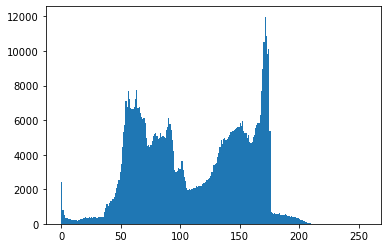

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images1.jfif',0)
plt.hist(img.ravel(),256,[0,256]); 
plt.show()

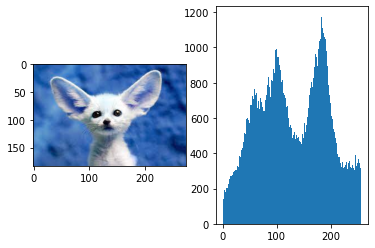

In [3]:
import cv2 as cv
img=cv.imread("animal.jfif")
plt.subplot(1,2,1)

plt.imshow(img)
plt.subplot(1,2,2)
plt.hist(img.ravel(), 256,[0,256])

plt.show()


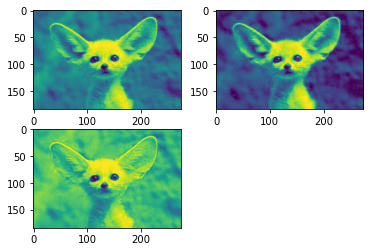

In [6]:
plt.subplot(2,2,1)
img1=img[: ,: , 1]
plt.imshow(img1)

plt.subplot(2,2,2)
img2=img[: ,:, 0]
plt.imshow(img2)

plt.subplot(2,2,3)
img3=img[: ,:, 2]
plt.imshow(img3)
plt.show()

plt.show()


#### guassian bluring

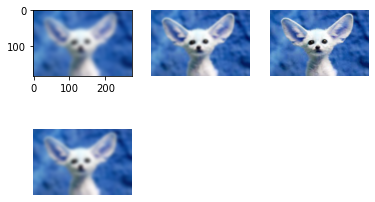

In [5]:
plt.subplot(2,3,1)
blur=cv.GaussianBlur(img , (31 ,31), 0)   ## (31,31) postive and odd number for kernal/avr
plt.imshow(blur)
plt.subplot(2,3,2)
blur1=cv.GaussianBlur(img , (11,11),0)
plt.imshow(blur1)
plt.axis("off")

plt.subplot(2,3,3)
blur2=cv.GaussianBlur(img , (3,3),0)
plt.imshow(blur2)
plt.axis("off")

plt.subplot(2,3,4)
blur3=cv.GaussianBlur(img , (23,23),0)
plt.imshow(blur3)
plt.axis("off")
plt.show()

## Median Filtering
Here, the function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise.

(-0.5, 273.5, 183.5, -0.5)

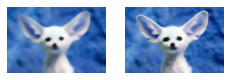

In [7]:
mblur=cv.medianBlur(img , 11)
plt.subplot(2,3,1)
plt.imshow(mblur)
plt.axis("off")

plt.subplot(2,3,2)
mblur1=cv.medianBlur(img , 5)
plt.imshow(mblur1)
plt.axis("off")

## Morphological Transformations
We will learn different morphological operations like Erosion, Dilation, Opening, Closing etc.
We will see different functions like : cv2.erode(), cv2.dilate(), cv2.morphologyEx() etc.


# Erosion
erosion = cv2.erode(img,kernel,iterations = 1)
decrease the white region
orignal pixel is 255white  will be considered  255white only if all pixel
under the kernal is 255white other it will  it will be erod to 0(zero)black
black pixel  niebhoris  white    change to black it and its will tick shape

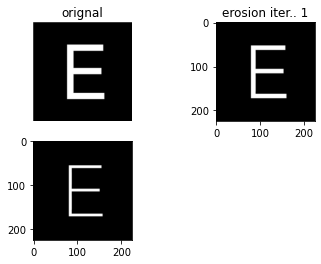

In [8]:
img=cv.imread("eimg.png")
plt.subplot(2,2,1)
plt.imshow(img)
plt.axis("off")
plt.title("orignal")

plt.subplot(2,2,2)
##erision > black  nieghbout  white becom black
kernal=np.ones((5,5) ,np.uint8)
erosion=cv.erode(img , kernal , iterations=1)
plt.imshow(erosion)
plt.title("erosion iter.. 1")

plt.subplot(2,2,3)
erosion2=cv.erode(img , kernal, iterations=2)
plt.imshow(erosion2)

## 2. Dilation
It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases.

(-0.5, 224.5, 224.5, -0.5)

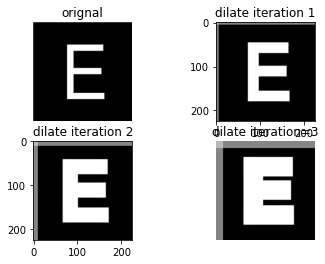

In [9]:
plt.subplot(2,2,1)
plt.imshow(img)
plt.axis("off")
plt.title("orignal")

plt.subplot(2,2,2)
kernal=np.ones((11,11) ,np.uint8)
dilat=cv.dilate(img , kernal , iterations=1)
plt.imshow(dilat)
plt.title("dilate iteration 1")

dilat2=cv.dilate(img , kernal , iterations=2)
plt.subplot(2,2,3)
plt.imshow(dilat2)
plt.title("dilate iteration 2")

dilat3=cv.dilate(img , kernal , iterations=3)
plt.subplot(2,2,4)
plt.imshow(dilat3)
plt.title("dilate iteration=3")
plt.axis("off")


## 3. Opening (first erosion then dilate) we can remove noise here also
Opening is just another name of ((erosion followed by dilation.)) It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

Text(0.5, 1.0, 'morph_open')

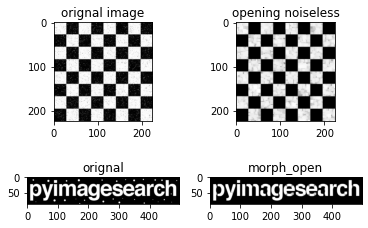

In [10]:
img=cv.imread("noise.jfif")
plt.subplot(221)
plt.imshow(img)
plt.title("orignal image")

##opening
kernal=np.ones((5,5) , np.uint8)
opening=cv.morphologyEx(img , cv.MORPH_OPEN , kernal)


plt.subplot(222)
plt.imshow(opening)
plt.title("opening noiseless")


plt.subplot(223)
img1=cv.imread("poly.png")
plt.imshow(img1)
plt.title("orignal")


kernal=np.ones((7,7) , np.uint8)
opening1=cv.morphologyEx(img1 , cv.MORPH_OPEN , kernal)

plt.subplot(224)
plt.imshow(opening1)
plt.title("morph_open")





## 4. Closing(dilation >>>>>erosion)
Closing is reverse of Opening,(( Dilation followed by Erosion)). It is useful in closing small holes inside the foreground objects, or small black points on the object.

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

Text(0.5, 1.0, 'MORPH_CLOSE')

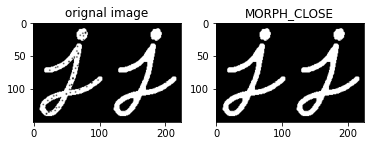

In [12]:
img=cv.imread("111.png")
plt.subplot(221)
plt.imshow(img)
plt.title("orignal image")

kernal=np.ones((5,5),np.uint8)
close_img=cv.morphologyEx(img, cv.MORPH_CLOSE , kernal)

plt.subplot(222)
plt.imshow(close_img)
plt.title("MORPH_CLOSE")


## 5. Morphological Gradient
It is the difference between dilation and erosion of an image.

The result will look like the outline of the object.

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

(-0.5, 224.5, 224.5, -0.5)

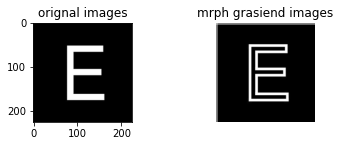

In [16]:
img=cv.imread("eimg.png")
plt.subplot(221)
plt.imshow(img)
plt.title("orignal images")

kernal=np.ones((7,7), np.uint8)
mrph_gradient=cv.morphologyEx(img , cv.MORPH_GRADIENT, kernal) ##outline images look here /create
plt.subplot(222)
plt.imshow(mrph_gradient)
plt.title("mrph grasiend images")
plt.axis("off")

# top hat 
difference btween inut and its opening images 
we just find the  fine image remove large thing 
small noise find
It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

Text(0.5, 1.0, 'top hat')

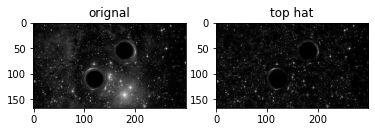

In [25]:
plt.subplot(221)
img=cv.imread("glaxy.jfif" , 0)
plt.imshow(img , cmap="gray")
plt.title("orignal")

plt.subplot(222)
kernal=np.ones((7,7), np.uint8)
tophat=cv.morphologyEx(img , cv.MORPH_TOPHAT , kernal)
plt.imshow(tophat , cmap="gray")
plt.title("top hat")

Text(0.5, 1.0, 'top hat')

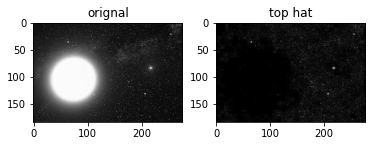

In [26]:
plt.subplot(221)
img=cv.imread("sky.jfif" , 0)
plt.imshow(img , cmap="gray")
plt.title("orignal")

plt.subplot(222)
kernal=np.ones((7,7), np.uint8)
tophat=cv.morphologyEx(img , cv.MORPH_TOPHAT , kernal)
plt.imshow(tophat , cmap="gray")
plt.title("top hat")

Text(0.5, 1.0, 'top hat')

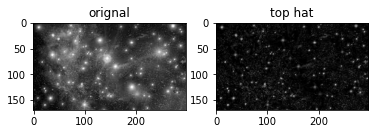

In [28]:
plt.subplot(221)
img=cv.imread("gg.jfif" , 0)
plt.imshow(img , cmap="gray")
plt.title("orignal")

plt.subplot(222)
kernal=np.ones((7,7), np.uint8)
tophat=cv.morphologyEx(img , cv.MORPH_TOPHAT , kernal)
plt.imshow(tophat , cmap="gray")
plt.title("top hat")

### 7. Black Hat
It is the difference between the closing of the input image and input image.

blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

Text(0.5, 1.0, 'black hat image')

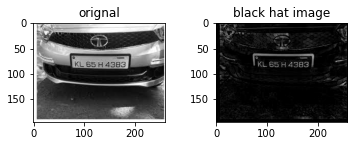

In [30]:
img=cv.imread("car.jfif")
plt.subplot(221)
plt.imshow(img)
plt.title("orignal")

kernal=np.ones((7,7) , np.uint8)
blackhat=cv.morphologyEx(img , cv.MORPH_BLACKHAT,  kernal)
plt.subplot(222)
plt.imshow(blackhat)
plt.title("black hat image")

### Structuring Element
We manually created a structuring elements in the previous examples with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.

In [31]:
# Rectangular Kernel
>>> cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

# Elliptical Kernel
>>> cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

# Cross-shaped Kernel
>>> cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# Image Gradients


Find Image gradients, edges etc
We will see following functions : cv2.Sobel(), cv2.Scharr(), cv2.Laplacian() etc

### to detects the  changs of intensities in images binary images called edge detection 

In [ ]:
image gradients using Sobel and Laplacian derivatives in OpenCV Python?

The following syntaxes are used to compute the image gradients using Sobel and Laplacian derivatives −

cv2.Sobel(img, ddepth, xorder, yorder, ksize)
cv2.Laplacian(img, ddepth)



### cv2.Sobel(img, ddepth, xorder, yorder, ksize)
img − The original input image.

ddepth − Desired depth of the output image. It has information about what kind of data is stored in the          output image. We use cv2.CV_64F to as ddepth. It is a 64bit floating-point opencv.

xorder − The order of derivatives in horizontal direction (X-direction). Set xorder=1, yorder=0 for the          1st order derivative in X-direction.

yorder − The order of derivatives in vertical direction (Y-direction). Set xorder=0, yorder=1 for the            1st order derivative in y-direction.

ksize − The kernel size. Set ksize=5 for a 5×5 kernel size.



(-0.5, 699.5, 465.5, -0.5)

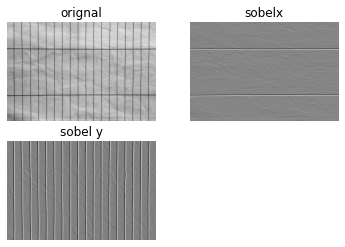

In [45]:
img=cv.imread("edge.jpg" , 0)
plt.subplot(221)
plt.imshow(img , cmap="gray")
plt.title("orignal")
plt.axis("off")
##display sobelx 
plt.subplot(222)
sobelx=cv.Sobel(img , cv.CV_64F , 0,1 ,ksize=5) ##ksize(5x5)
plt.imshow(sobelx , cmap="gray")
plt.title("sobelx")
plt.axis("off")

##display sobely
plt.subplot(223)
sobely=cv.Sobel(img , cv.CV_64F , 1, 0 , ksize=9) ##ksize(9x9)
plt.imshow(sobely , cmap="gray")
plt.title("sobel y")
plt.axis("off")



# cv.Laplacian(img, ddepth)
more info mean drivative of drivative 

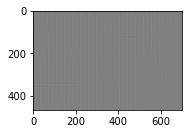

In [52]:
import cv2 as cv
plt.subplot(221)
laplacim=cv.Laplacian(img , cv.CV_64F)
plt.imshow(laplacim , cmap="gray")

(Text(0.5, 1.0, 'Sobel xY'), ([], []), ([], []))

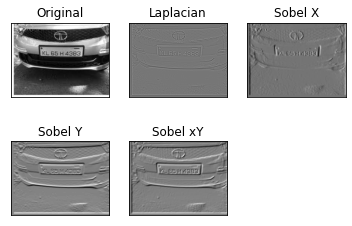

In [2]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('car.jfif',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)


# add this x y sobel
add_img=cv2.addWeighted(sobelx, 0.5 , sobely , 0.5 , 0)


plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(add_img,cmap = 'gray')
plt.title('Sobel xY'), plt.xticks([]), plt.yticks([])

## Image Pyramids
Image pyramid is nothing but a method to display a multi-resolution image. The lowermost layer is a highest-resolution version of image and the topmost layer is a lowest-resolution version of the image. Image pyramids are used to handle image at different scales.
##we used to work with an image of constant size. But in some occassions, we need to work with images of different resolution of the same image.
We will see these functions: 



In [ ]:
here are two kinds of Image Pyramids.
1) Gaussian Pyramid 
       cv2.pyrUp(), : to increase the resolution of an image if u loss once resolution then pyrup then its 
                      resolution will low than orignal becoz we losed some info.. before pyrup

       cv2.pyrDown()  : to reduce the resolution of an image

2) Laplacian Pyramids

Text(0.5, 1.0, 'pyrdown 3')

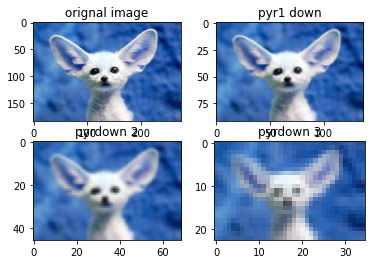

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
img=cv.imread("animal.jfif")
plt.subplot(221)
plt.imshow(img)
plt.title("orignal image")
# plt.axis("off")

pyrdown=cv.pyrDown(img)
plt.subplot(222)
plt.imshow(pyrdown)
plt.title("pyr1 down")
# plt.axis("off")
plt.subplot(223)
pyrdown2=cv.pyrDown(pyrdown)
plt.imshow(pyrdown2)
plt.title("pyrdown 2")

plt.subplot(224)
pyrdown3=cv.pyrDown(pyrdown2)
plt.imshow(pyrdown3)
plt.title("pyrdown 3")





### cv2.pyrUp(), : 
    to increase the resolution of an image if u loss once resolution then pyrup then its 
    resolution will low than orignal becoz we losed some info.. before pyrup

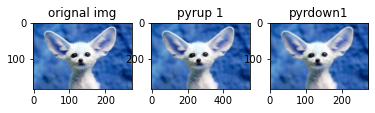

In [9]:
img=cv.imread("animal.jfif")
plt.subplot(231)
plt.imshow(img)
plt.title("orignal img")
# cv.imshow("orignal " , img)


plt.subplot(232)
pyrup=cv.pyrUp(img)
plt.imshow(pyrup)
plt.title("pyrup 1")

# cv.imshow("pyrup" , pyrup)

plt.subplot(233)
pyrdown1=cv.pyrDown(pyrup)
plt.title("pyrdown1")
plt.imshow(pyrdown1)
# cv.imshow("pyrdown the up one" , pyrdown1)


cv.waitKey(0)
cv.destroyAllWindows()



# canny edge detection
1 noise removimg: use gaussian filter to remove noise :which make edge so need to remove

2 find intensity of gradient image:find sobelX and sobelY and then add using gradient sobelx+sobelY
3 non maximium  suppresion:USE  algorithm goes on alll pixel and find the max val gradiend edge 
4 double thresholding:  max value and min val :: max val sure to be edge while min val for non edge 
5: hysteresis:  sure edge pixel considered to be part of edge while discarde non edge  

finL =to make canny detection 


(-0.5, 273.5, 183.5, -0.5)

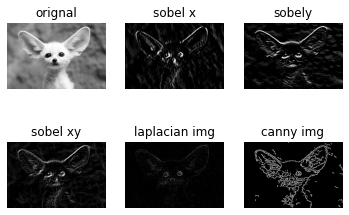

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img=cv.imread("animal.jfif" , 0)
# first step sobelx AND SOBELy
sobelX=cv.Sobel(img ,-1, 1,0) ##also we can write(img , cv.CV_64F, x,y)
sobelY=cv.Sobel(img, -1 , 0 ,1)
# add sobelx and sobely
sobelxy=cv.addWeighted(sobelX , 0.5 , sobelY , 0.5 , 0)

# step 2 laplacian
img_lap=cv.Laplacian(img, -1) ##we can write (img , cv.CV_64F)

# now we are in final stage:to find canny edge
canny_output=cv.Canny(img, 80, 120)
# outputregion

plt.subplot(231)
plt.imshow(img, cmap="gray")
plt.title("orignal")
plt.axis("off")

plt.subplot(232)
plt.imshow(sobelX, cmap="gray")
plt.title("sobel x")
plt.axis("off")


plt.subplot(233)
plt.imshow(sobelY, cmap="gray")
plt.title("sobely")
plt.axis("off")


plt.subplot(234)
plt.imshow(sobelxy, cmap="gray")
plt.title("sobel xy")
plt.axis("off")

plt.subplot(235)
plt.imshow(np.real(img_lap), cmap="gray")#typeerror-image-data-can-not-convert-to-float due to error i used np.real(img)
plt.title("laplacian img")
plt.axis("off")

plt.subplot(236)
plt.imshow(canny_output ,cmap="gray")
plt.title("canny img")
plt.axis("off")


## insteaad of this we use only on line for cannydetection
OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument 

(-0.5, 273.5, 183.5, -0.5)

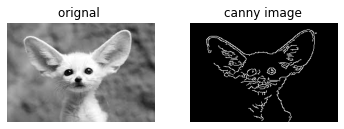

In [15]:
img=cv.imread("animal.jfif" ,0)
canny_img=cv.Canny(img , 100 , 200) ##(src , maxvl=edge , minval nonedge , defualt 3x3 )
plt.subplot(221)#### canny give us edge of image
plt.imshow(img, cmap="gray")
plt.title("orignal ")
plt.axis("off")

plt.subplot(222)
plt.imshow(canny_img, cmap="gray")
plt.title("canny image")
plt.axis("off")

## What are contours? (boundary around something)
is a boundry around something that has well defines edges , alway use binary image (becoz only white and black)
The contours are a useful tool for shape analysis and object detection and recognition.

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables.
In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

(-0.5, 273.5, 183.5, -0.5)

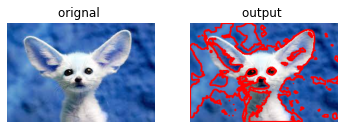

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread("animal.jfif")

plt.subplot(221)
plt.imshow(img)
plt.title("orignal ")
plt.axis("off")
gray_img=cv.cvtColor(img , cv.COLOR_BGR2GRAY)

###convert image to binary
ret , thresh=cv.threshold(gray_img , 127 , 255 , cv.THRESH_BINARY)
##find contours in binary img
contours , hie=cv.findContours(thresh, cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
# for data in contours:
#     print(f"the cont have this {data} ")
    
cv.drawContours(img , contours, -1,(255,0,0),2)
    
plt.subplot(222)
plt.imshow(img, cmap="gray")
plt.title("output ")
plt.axis("off")

# cv.imshow("output" , img)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [15]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    ###convert image to binary
    ret , thresh=cv.threshold(gray , 90 , 255 , cv.THRESH_BINARY) ##src,from pixel<mulply 255, threshbin
##find contours in binary img
    contours , hie=cv.findContours(thresh, cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)

    cv.drawContours(frame , contours, -1,(0,255,0),2)###src,contours,depth, (color) ,thickness
    
    
    # Display the resulting frame
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('d'):
        break
# When everything done, release the capture
cap.release()
cv.waitKey(0)
cv.destroyAllWindows()